Dataset link : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/kernels

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [188]:
car = pd.read_csv('C:/Users/user/Desktop/car data.csv')
car.columns = [i.lower() for i in car.columns]
print("Number of rows : ",car.shape[0])
print("Number of columns : ",car.shape[1])


# drop duplicates rows if present
car.drop_duplicates(keep = 'first',inplace = True)

# resetting index 
car.reset_index(inplace = True,drop = True)

Number of rows :  301
Number of columns :  9


In [189]:
print("Numerical feature : ")
print(car.select_dtypes(include = "number").columns)
print("\n Categorical feature : ")
print(car.select_dtypes(exclude = "number").columns)

Numerical feature : 
Index(['year', 'selling_price', 'present_price', 'kms_driven', 'owner'], dtype='object')

 Categorical feature : 
Index(['car_name', 'fuel_type', 'seller_type', 'transmission'], dtype='object')


In [190]:
# info of the dataset ,
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
car_name         299 non-null object
year             299 non-null int64
selling_price    299 non-null float64
present_price    299 non-null float64
kms_driven       299 non-null int64
fuel_type        299 non-null object
seller_type      299 non-null object
transmission     299 non-null object
owner            299 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.1+ KB


In [191]:
# description of data 
# luckily we don't have any missing value's in our dataset . 
car.describe()

,year,selling_price,present_price,kms_driven,owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Explanatory Data Analysis 

## 1. Which vehicle got highest price ? 

In [192]:
car[car.present_price == car.present_price.max()][['car_name','present_price']]

,car_name,present_price
85,land cruiser,92.6


# 2. which top 10 vehicle company is in more for sale ?

In [193]:
px.pie(data_frame = car ,names = car.car_name.value_counts().head(10).index,values = car.car_name.value_counts().values[0:10],
      title = "Top 10 vehicle company is more for sale",hole = 0.7
      )

## 3 . which year more number of vehicle  are being availabel for second's  ?

Text(0.5, 1.0, "year v/s vehicle's availabel for second's ")

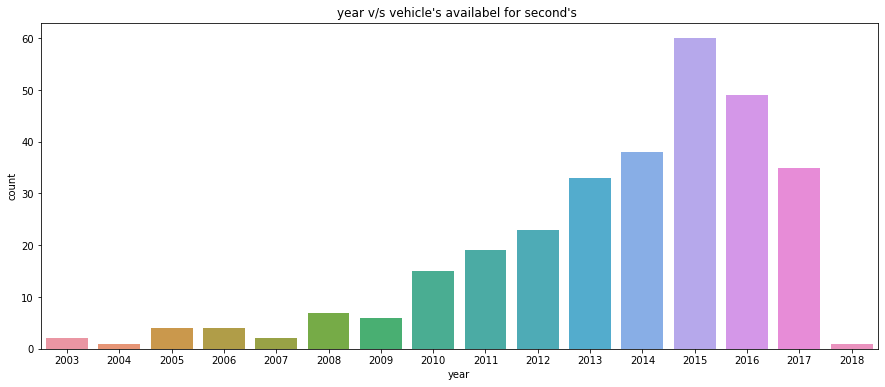

In [194]:
plt.rcParams['figure.figsize'] = (15,6)
sns.countplot(car['year'])
plt.title("year v/s vehicle's availabel for second's ")

# 4 . selling_price v/s present_price ? 

# From the plot  we can conclude that

  *  selling price of  vehicle is lesser than it's present price  ,it might be due to less demand or more usage of that 
      particular vehicle . 

Text(0, 0.5, 'Price')

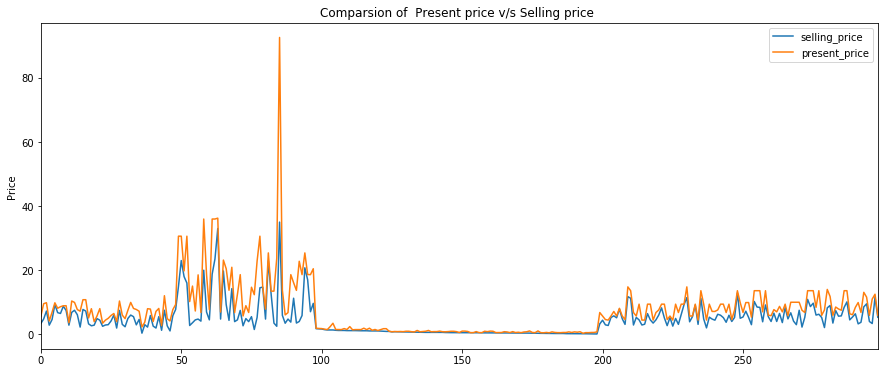

In [195]:
car[["selling_price","present_price"]].plot(kind = 'line')
plt.title("Comparsion of  Present price v/s Selling price ")
plt.ylabel("Price")

# 5. which type of fuel used by most of the vehicle ?

In [196]:
px.pie(data_frame = car ,names = car.fuel_type.value_counts().index,values = car.fuel_type.value_counts().values,
      title = "vehicle fuel type " ,hole = 0.7
      )

# 5. which type of transmission used by most of the vehicle ?

In [197]:
px.pie(data_frame = car ,names = car.transmission.value_counts().index,values = car.transmission.value_counts().values,
      title = "vehicle transmission type " ,hole = 0.7
      )

# 6.  Relationship between selling price v/s kms_driven

In [198]:
px.scatter(data_frame = car,y = car['selling_price'],x =  car['kms_driven'],title = 'sp v/s kms_driven')
# higher the kms driven lesser the selling price of vehicle would be . 

# 7. seller type 

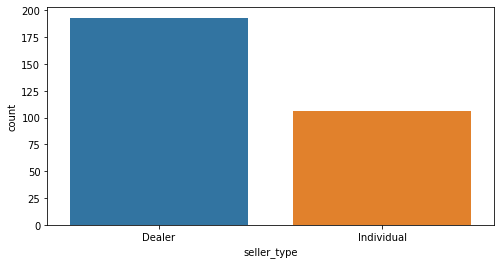

In [199]:
# Most of the vehicle owner are trying to sell their vehicle with the help of  dealer  
plt.rcParams['figure.figsize'] = (8,4)
sns.countplot(car['seller_type'])

In [200]:
# let's create one new feature .
car['cur_year'] = 2020
car.head(3)

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,cur_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020


In [201]:
car['year'].max()

2018

In [202]:
# let's create one more new feature called . 
car['years_used'] = car['cur_year'] - car['year']

# drop cur_year and year feature from the dataset .
car.drop(['cur_year','year'],axis = 1,inplace = True)
car.head(3)

,car_name,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,years_used
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3


# 8. years_used v/s selling price . 

In [203]:
px.scatter(data_frame = car,x = car['years_used'],y =  car['selling_price'],title = 'years_used v/s sp',color = 'years_used')
# higher the years_used lesser the selling price of vehicle would be . 

## 9 . what is the count of vehicle which are available depending upon  years_used ?

In [204]:
px.bar(x = car['years_used'].value_counts().index , y =car['years_used'].value_counts().values,
       color = car['years_used'].value_counts().index,title = 'years used',labels = {"x":'years used',"y":"count"})

# 10 . years used v/s kms_driven . 

In [205]:
new_df = pd.pivot_table(car, index = ['years_used'],values = 'kms_driven')
px.pie(names = new_df.index ,values = new_df.values,title = 'years used v/s kms_driven' )
# Higher the years used higher the kms_driven will be .

# outlier detection 

Text(0.5, 1.0, 'selling_price v/s present_price')

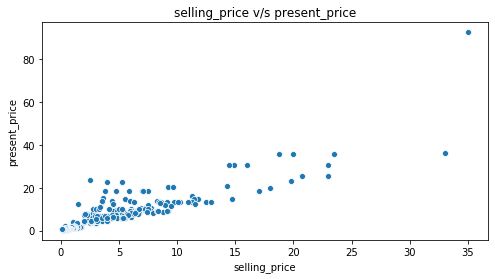

In [206]:
# we can see the linear relationship between sp v/s pp .
sns.scatterplot(x = car['selling_price'],y =  car['present_price'])
plt.title('selling_price v/s present_price')

## present_price

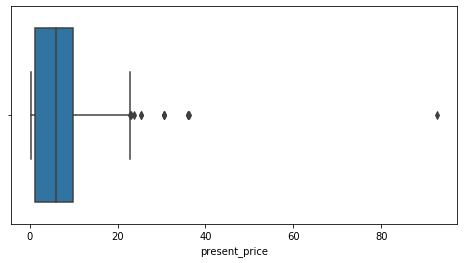

In [207]:
sns.boxplot(car['present_price'])

In [208]:
q1 = car['present_price'].quantile(0.25)
q3 = car['present_price'].quantile(0.75)
iqr = q3 - q1
lb = q1 - iqr*1.5
ub = q3 + iqr*1.5
lb,ub

# -11 is meaningless, price can't be negative .

# 22.8 only few  of the vehicle present price is greater than 20 lakhs  .

(-11.760000000000002, 22.8)

In [209]:
print("Vehicle  present prices which are acting has outlier :")
car[car['present_price'] >= 22.8 ][['car_name','present_price','selling_price']]

Vehicle  present prices which are acting has outlier :


,car_name,present_price,selling_price
49,fortuner,30.61,14.90
50,fortuner,30.61,23.00
52,fortuner,30.61,16.00
58,fortuner,35.96,19.99
61,fortuner,35.96,18.75
62,fortuner,35.96,23.50
63,fortuner,36.23,33.00
65,innova,23.15,19.75
77,corolla altis,22.83,5.25
78,fortuner,30.61,14.50


# Let's see the distribution of all the features 

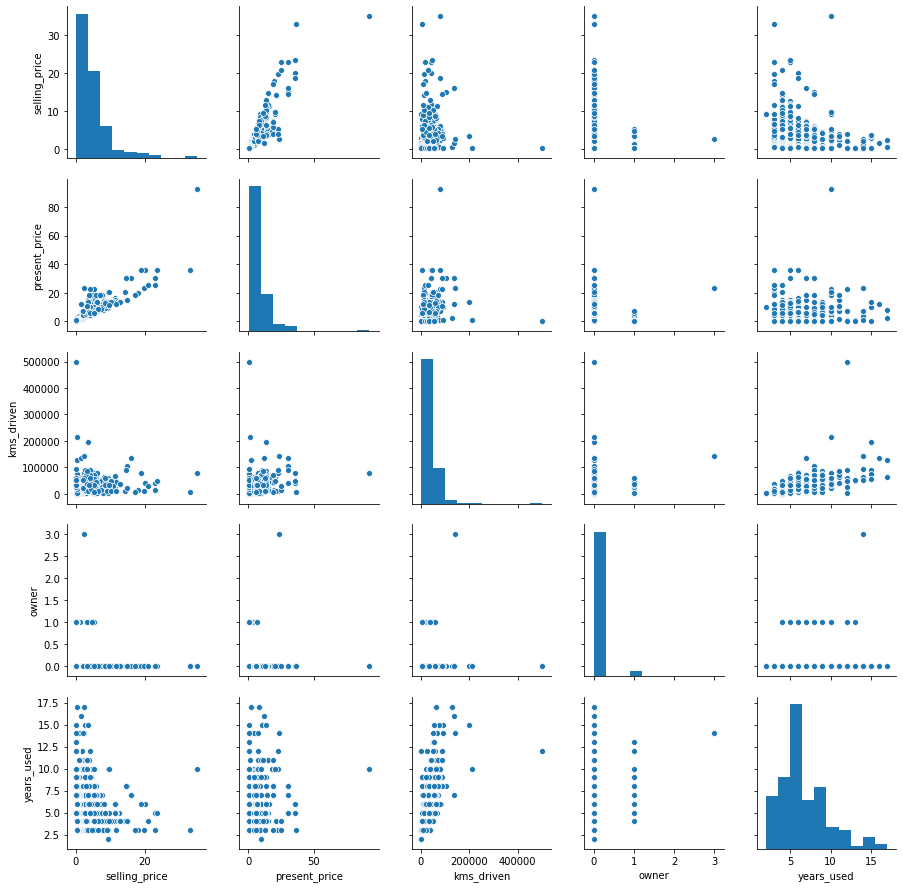

In [210]:
sns.pairplot(car)

# Let's see the correlation among features . 

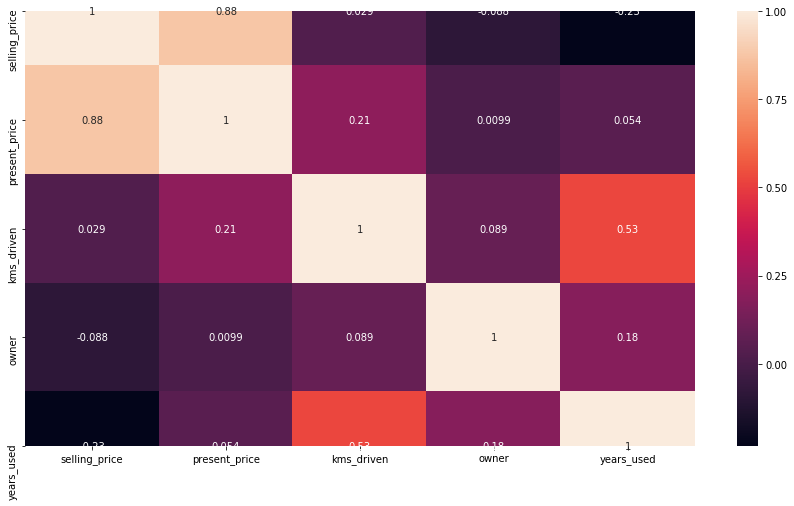

In [211]:
plt.figure(figsize=(15,8))
sns.heatmap(car.corr(),annot = True)

In [212]:
# let's drop unwanted features 
car.drop(['car_name','owner'],axis = 1,inplace = True)
car.head(2)

,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,years_used
0,3.35,5.59,27000,Petrol,Dealer,Manual,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,7


In [213]:
# convert categorical variable into numerical variable . 
car = pd.get_dummies(car,drop_first = True)
car.head(2)

,selling_price,present_price,kms_driven,years_used,fuel_type_Diesel,fuel_type_Petrol,seller_type_Individual,transmission_Manual
0,3.35,5.59,27000,6,0,1,0,1
1,4.75,9.54,43000,7,1,0,0,1


# Model Building 

In [248]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [237]:
x = car.drop('selling_price',axis = 1)
y = car['selling_price']

In [238]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 33)
print("Training data : ",xtrain.shape, ytrain.shape)
print("Testing data  : ",xtest.shape, ytest.shape)

Training data :  (209, 7) (209,)
Testing data  :  (90, 7) (90,)


In [239]:
rf = RandomForestRegressor()

In [240]:
param_grid = {
     
    'n_estimators' : [50,100,150,250,300,350],
     'max_depth'   : [i for i in range(7,25)] , 
     'min_samples_split' : [i for i  in range(5,25)],
     'min_samples_leaf' : [2,3,4,7,10]
}

In [241]:
# using 10 fold
rf = RandomizedSearchCV(estimator = rf,param_distributions = param_grid,n_jobs = 1,cv = 10)

In [242]:
rf.fit(xtrain,ytrain)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


In [245]:
print("best parameters : ")
rf.best_params_

best parameters : 


{'n_estimators': 300,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 22}

In [246]:
# make prediction 
pred = rf.predict(xtest)

In [255]:
print("MSE value is : ",mean_squared_error(ytest,pred))
print("r2  value is : ",r2_score(ytest,pred))
r2 = r2_score(ytest,pred)
n = len(xtest)
k = xtest.shape[1]
adj_r2_score = 1 - (((1- r2)*(n-1)) / (n - k - 1))
print("adj_r2_score  value is : ",adj_r2_score)

MSE value is :  4.6325462112716425
r2  value is :  0.8667858813918922
adj_r2_score  value is :  0.8554139444375415


# pred v/s actual 

Text(0, 0.5, 'predict')

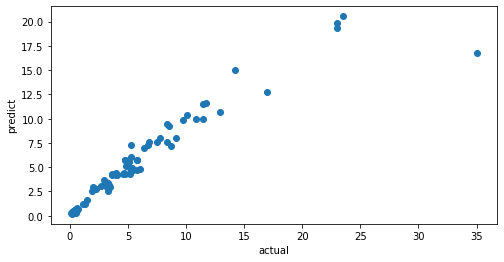

In [260]:
plt.scatter(ytest,pred)
plt.xlabel('actual')
plt.ylabel('predict')

In [261]:
# Although this is simple analysis ,the dataset is too small so we cannot explore further .


# Thank You :) 